In [25]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline  

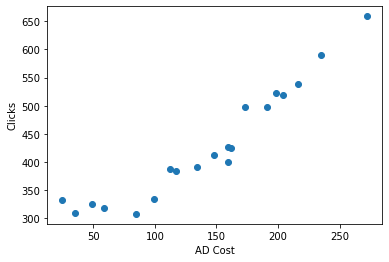

In [26]:
# read csv => ndarray
train = np.loadtxt('click.csv', delimiter=',', dtype='int', skiprows=1)

train_x = train[:, 0] 
train_y = train[:, 1] 

plt.plot(train_x, train_y, 'o')
plt.xlabel('AD Cost')
plt.ylabel('Clicks')
plt.show()

In [27]:
# standardization
train_z = (train_x - np.mean(train_x)) / np.std(train_x)
print(train_z)

a = np.random.randn(1)[0]
b = np.random.randn(1)[0]

ETA = 0.01
errDiff = 1 
cnt = 0 

def f(x):
    return a * x + b

def E(x, y):
    err = (y - f(x)) ** 2
    return np.sum(err) / 2 

[ 1.39433428  1.11069026  0.09554325 -1.59139223 -0.8449606   0.93154667
 -1.38239138 -1.74067856  0.46875906  0.73747445 -0.11345761 -0.63595975
 -0.36724436 -0.44188752  0.3045441   1.94669369  0.25975821  0.25975821
 -1.23310505  0.84197488]


In [28]:
e = E(train_z, train_y)
while errDiff > 0.01: 
    # y^ = ax + b
    # w - (-(y - y^) * x)   =>  w + (( y - y^) * x)
    a_one = ETA * np.sum(((train_y - f(train_z)) * train_z)) # derivative 미분 ???
    a += a_one
    
    # b - (-(y - y^) * 1)   =>  b + (( y - y^) * 1)
    b_one = ETA * np.sum((train_y - f(train_z)) * 1)
    b += b_one
    
    errModified = E(train_z, train_y) 
    errDiff = e - errModified
    e = errModified         
    cnt += 1         
    
    fmt = 'cnt:{0},  a:{1:.3f}, b:{2:.3f}, errDiff:{3: .3f}'
    print(fmt.format(cnt, a, b, errDiff))
    

cnt:1,  a:18.575, b:85.971, errDiff: 694024.630
cnt:2,  a:33.556, b:154.607, errDiff: 444175.763
cnt:3,  a:45.540, b:209.516, errDiff: 284272.489
cnt:4,  a:55.128, b:253.443, errDiff: 181934.393
cnt:5,  a:62.798, b:288.584, errDiff: 116438.011
cnt:6,  a:68.934, b:316.697, errDiff: 74520.327
cnt:7,  a:73.843, b:339.188, errDiff: 47693.009
cnt:8,  a:77.770, b:357.180, errDiff: 30523.526
cnt:9,  a:80.912, b:371.574, errDiff: 19535.057
cnt:10,  a:83.425, b:383.089, errDiff: 12502.436
cnt:11,  a:85.436, b:392.301, errDiff: 8001.559
cnt:12,  a:87.045, b:399.671, errDiff: 5120.998
cnt:13,  a:88.331, b:405.567, errDiff: 3277.439
cnt:14,  a:89.361, b:410.284, errDiff: 2097.561
cnt:15,  a:90.184, b:414.057, errDiff: 1342.439
cnt:16,  a:90.843, b:417.075, errDiff: 859.161
cnt:17,  a:91.370, b:419.490, errDiff: 549.863
cnt:18,  a:91.792, b:421.422, errDiff: 351.912
cnt:19,  a:92.129, b:422.968, errDiff: 225.224
cnt:20,  a:92.399, b:424.204, errDiff: 144.143
cnt:21,  a:92.615, b:425.193, errDiff: 9

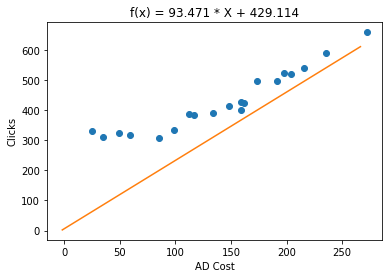

In [29]:
minx = np.min(train_z)
maxx = np.max(train_z)
miny = f(minx)
maxy = f(maxx)

plt.plot(train_x, train_y, 'o')
plt.plot((minx, miny), (maxx, maxy))
plt.title('f(x) = {0:.3f} * X + {1:.3f}'.format(a, b))
plt.xlabel('AD Cost')
plt.ylabel('Clicks')
plt.show()